In [8]:
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import huffman
import math
import json
import dahuffman

In [9]:
DATA_DIR = os.path.join('data')
X_DATA_FILEPATH = os.path.join(DATA_DIR, 'xxx.txt')
Y_DATA_FILEPATH = os.path.join(DATA_DIR, 'yyy.txt')

def load_data(filepath):
    with open(filepath) as f:
        # skipt the first line - infor about the autor and the book
        f.readline()
        return f.read()

x_data = load_data(X_DATA_FILEPATH)
y_data = load_data(Y_DATA_FILEPATH)
print('X data size:', len(x_data))
print('Y data size:', len(y_data))    

X data size: 5607
Y data size: 5086


### 1) Estimate the probabilities of the characters (including spaces) for each text separately. Plot the resulting probabilities.


In [10]:
CHARS_PROBAB_KEYS = [' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

def compute_chars_probab(data):
    assert(len(CHARS_PROBAB_KEYS) == 27)
    chars_frequency = {key: 0 for key in CHARS_PROBAB_KEYS}

    for char in data:
        if char not in CHARS_PROBAB_KEYS:
            continue

        char = char.lower()
        if char in chars_frequency:
            chars_frequency[char] += 1
        else:
            chars_frequency[char] = 1
    total_chars = len(data)
    
    chars_probab = chars_frequency.copy()
    for char in chars_probab:
        chars_probab[char] /= total_chars
    return chars_probab, chars_frequency


def print_chars_probab(chars_probab, text_name):
    print('Probabilities of the characters in', text_name)
    for char in sorted(list(chars_probab.keys())):
        print('\t', char, ':', chars_probab[char])
    print('-----------------------------------')


chars_probab_x, chars_frequency_x = compute_chars_probab(x_data)
chars_probab_y, chars_frequency_y = compute_chars_probab(y_data)
# print_chars_probab(chars_probab_x, 'xxx')
# print_chars_probab(chars_probab_y, 'yyy')

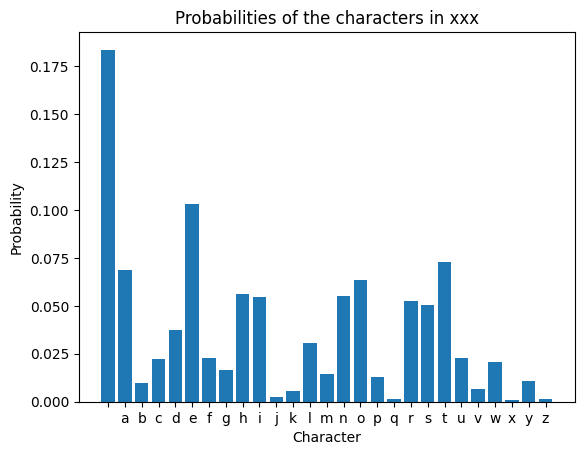

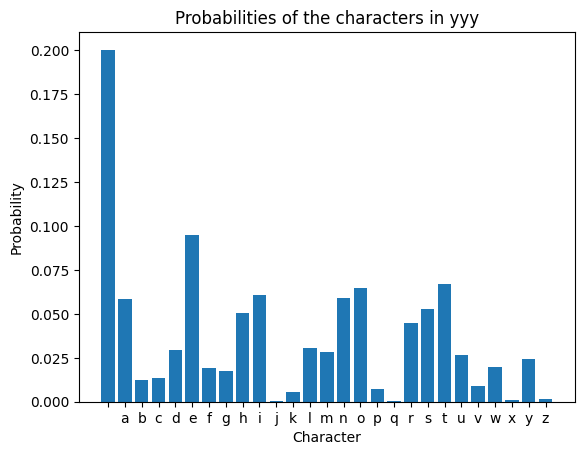

In [11]:
# plot it
def plot_chars_probab(chars_probab, text_name):
    sorted_keys = sorted(chars_probab.keys())
    sorted_chars_probabs = [chars_probab[key] for key in sorted_keys]
    plt.bar(sorted_keys, sorted_chars_probabs)
    plt.xlabel('Character')
    plt.ylabel('Probability')
    plt.title('Probabilities of the characters in ' + text_name)
    plt.show()


plot_chars_probab(chars_probab_x, 'xxx')
plot_chars_probab(chars_probab_y, 'yyy')

### 2) Calculate the entropy of the estimated character distribution for each text separately.

In [12]:
max_entropy = math.log2(27)

print('Max entropy:', max_entropy)
print('------------------')

x_entropy = stats.entropy(list(chars_probab_x.values()), base=2)
y_entropy = stats.entropy(list(chars_probab_y.values()), base=2)
print('Entropy of xxx:', x_entropy)
print('Entropy of yyy:', y_entropy)


Max entropy: 4.754887502163468
------------------
Entropy of xxx: 4.078928812189476
Entropy of yyy: 4.06706492699646


Entropy of the first file is $H(X) = 4.079$ <br/>
Entropy of the second file is $H(Y) = 4.067$ <br />

This implies that for both files we would need 2.8 bits on average to encode each symbol. This gives a lower bound on how much sapce one *theoretically* need to represent each symbol optimally.

Where max possible entropy is 4.755 (happens when all characters would have the same probability)

### 3) Find the optimal instant binary code C to encode the characters of the first text. Explain why this code is optimal!

I will use huffman code which is instant and optimal (using library *huffman*).

In [13]:
a = [ (key, chars_frequency_x[key]) for key in CHARS_PROBAB_KEYS ]
x_huffman = huffman.codebook(a)
a = [ (key, chars_frequency_y[key]) for key in CHARS_PROBAB_KEYS ]
y_huffman = huffman.codebook(a)

print('Huffman codebook for xxx:')
for char, code in x_huffman.items():
    print(f"'{char}': {code}")

Huffman codebook for xxx:
' ': 111
'a': 1011
'b': 1010101
'c': 00000
'd': 11010
'e': 001
'f': 00001
'g': 101011
'h': 1000
'i': 0110
'j': 110111110
'k': 11011110
'l': 10100
'm': 000111
'n': 0111
'o': 1001
'p': 000110
'q': 1101111110
'r': 0101
's': 0100
't': 1100
'u': 00010
'v': 1010100
'w': 110110
'x': 11011111110
'y': 1101110
'z': 11011111111


### 4) Compute the expected values of the length of the code C for each text separately and compare it with the entropy of the character distribution. Is the code C also optimal for the second text? Properly explain!


In [14]:
expected_length_code_x = sum([chars_probab_x[key] * len(x_huffman[key]) for key in CHARS_PROBAB_KEYS])
expected_length_code_y = sum([chars_probab_y[key] * len(y_huffman[key]) for key in CHARS_PROBAB_KEYS])
print('Expected length of the code for xxx:', expected_length_code_x, 'x_entropy:', x_entropy)
print('Expected length of the code for yyy:', expected_length_code_y, 'y_entropy:', y_entropy)

Expected length of the code for xxx: 4.115926520420901 x_entropy: 4.078928812189476
Expected length of the code for yyy: 4.103814392449863 y_entropy: 4.06706492699646


Entropy is the lower bound. The expected value of the length of the code $C$ is equal to entropy $H$ only if $2^{-l_i} = p_i$ for all $i$. We can see that expected value of length of the code for both files is close to the entropy.